In [1]:
from util import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [2]:
import yal

modules = yal.read('./yal_files/ami33.yal')

participants = yal.util.as_participants(modules)

#participants

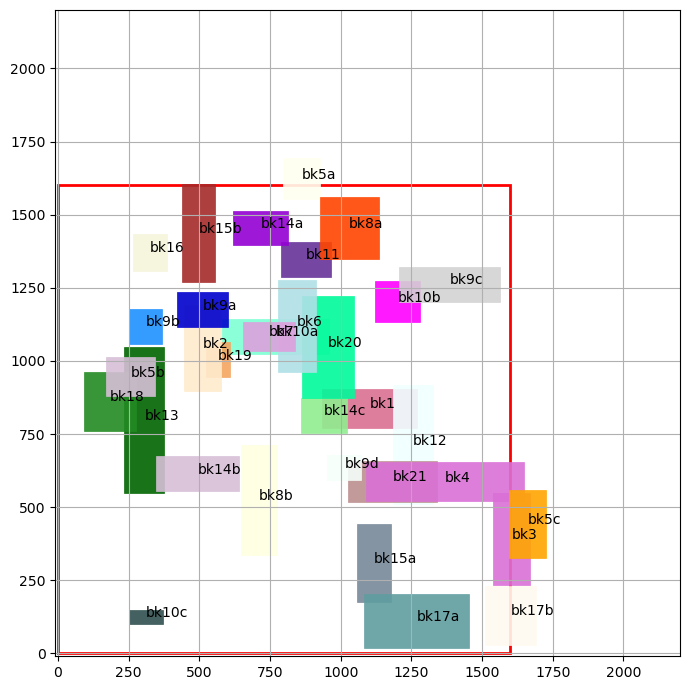

In [3]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 1600,
               "height" : 1600}

conciliation_quota  = 1

critical_amount     = 100

p   = random_place_mcnc(participants, layout_zone, 666)

a = plot_participants(layout_zone, p, 2200, 2200)

In [4]:
participants            = determine_initial_conditions(p, layout_zone, conciliation_quota, critical_amount)


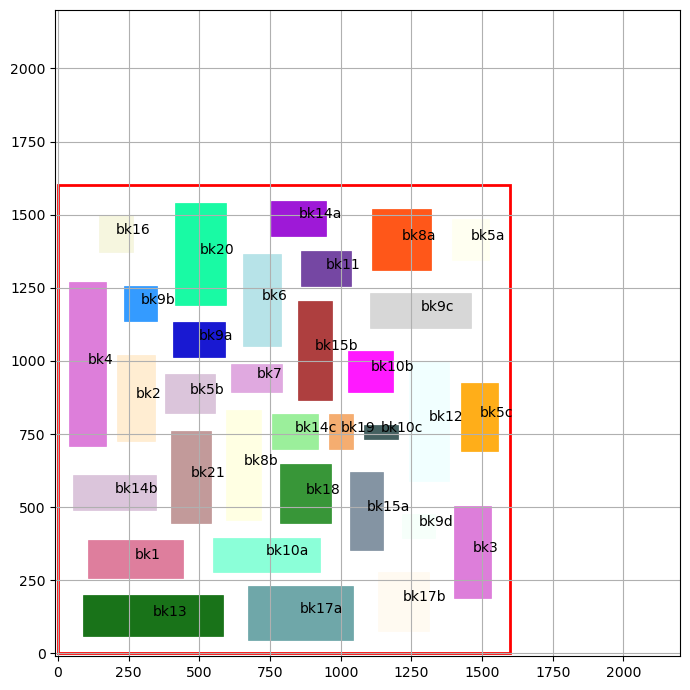

In [5]:

while True:

    participants    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 2200, 2200)

    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    #print(last_moves)

    if moves.count('linger') == len(participants):
        layout_zone         = scale_layout_zone(layout_zone, 0.99)

        participants        = reset_after_tightening(participants)

    if layout_zone['width'] < 1500:
        break

    # Minimum distance to large!